In [1]:
# Dataset Description 
### Wine Quality
### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine
### Input variables (based on physicochemical tests):
"""
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 
Output variable (based on sensory data): 
12 - quality (score between 0 and 10)
"""

### As this is a classification Problem so I have used 
### Random forest classifier 
### Support Vector Classifier(SVC)

'\n1 - fixed acidity \n2 - volatile acidity \n3 - citric acid \n4 - residual sugar \n5 - chlorides \n6 - free sulfur dioxide \n7 - total sulfur dioxide \n8 - density \n9 - pH \n10 - sulphates \n11 - alcohol \nOutput variable (based on sensory data): \n12 - quality (score between 0 and 10)\n'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
import os
os.chdir("/Users/ummekulsum/DataScience/FSDS 2025/Projects_DS")

In [4]:
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_csv("white.csv")

In [6]:
data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
data = data.drop(columns=["Unnamed: 0"])


In [8]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
# checking null values 
data.isnull().sum()

##No Null values present 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# Checking data type of each columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Exploratory Data analysis through visualization


<Axes: >

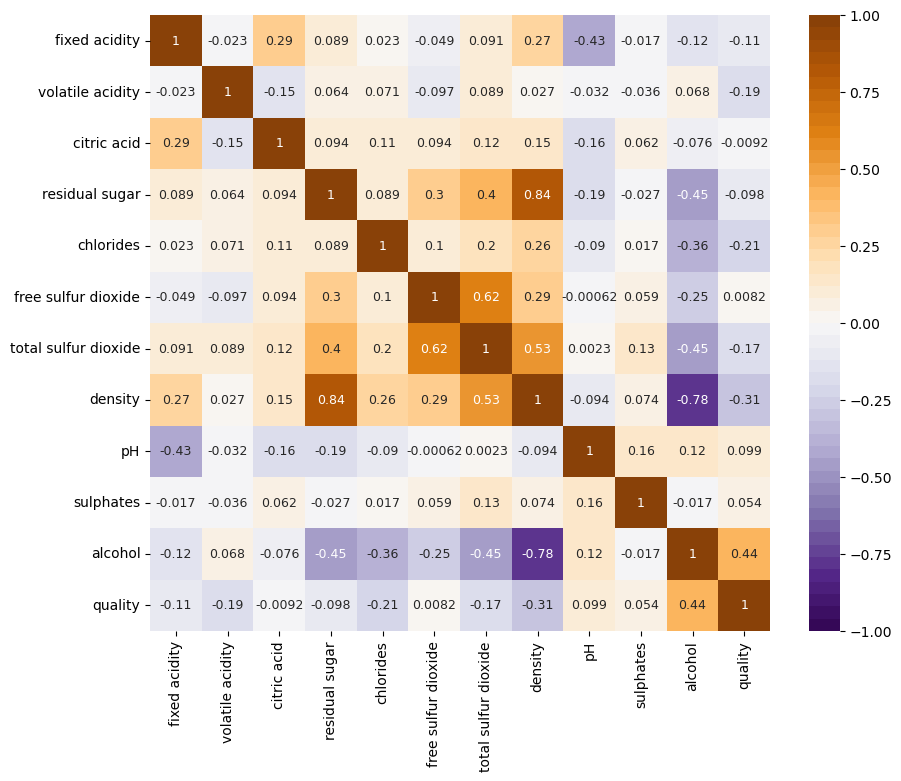

In [11]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 9}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)

#### From the above white wine heatmap, we have the following inferences

#### Low density contents are high on alcohol content Sugar content is highly correalted to the wine density Total and free sulfur dioxide are related together

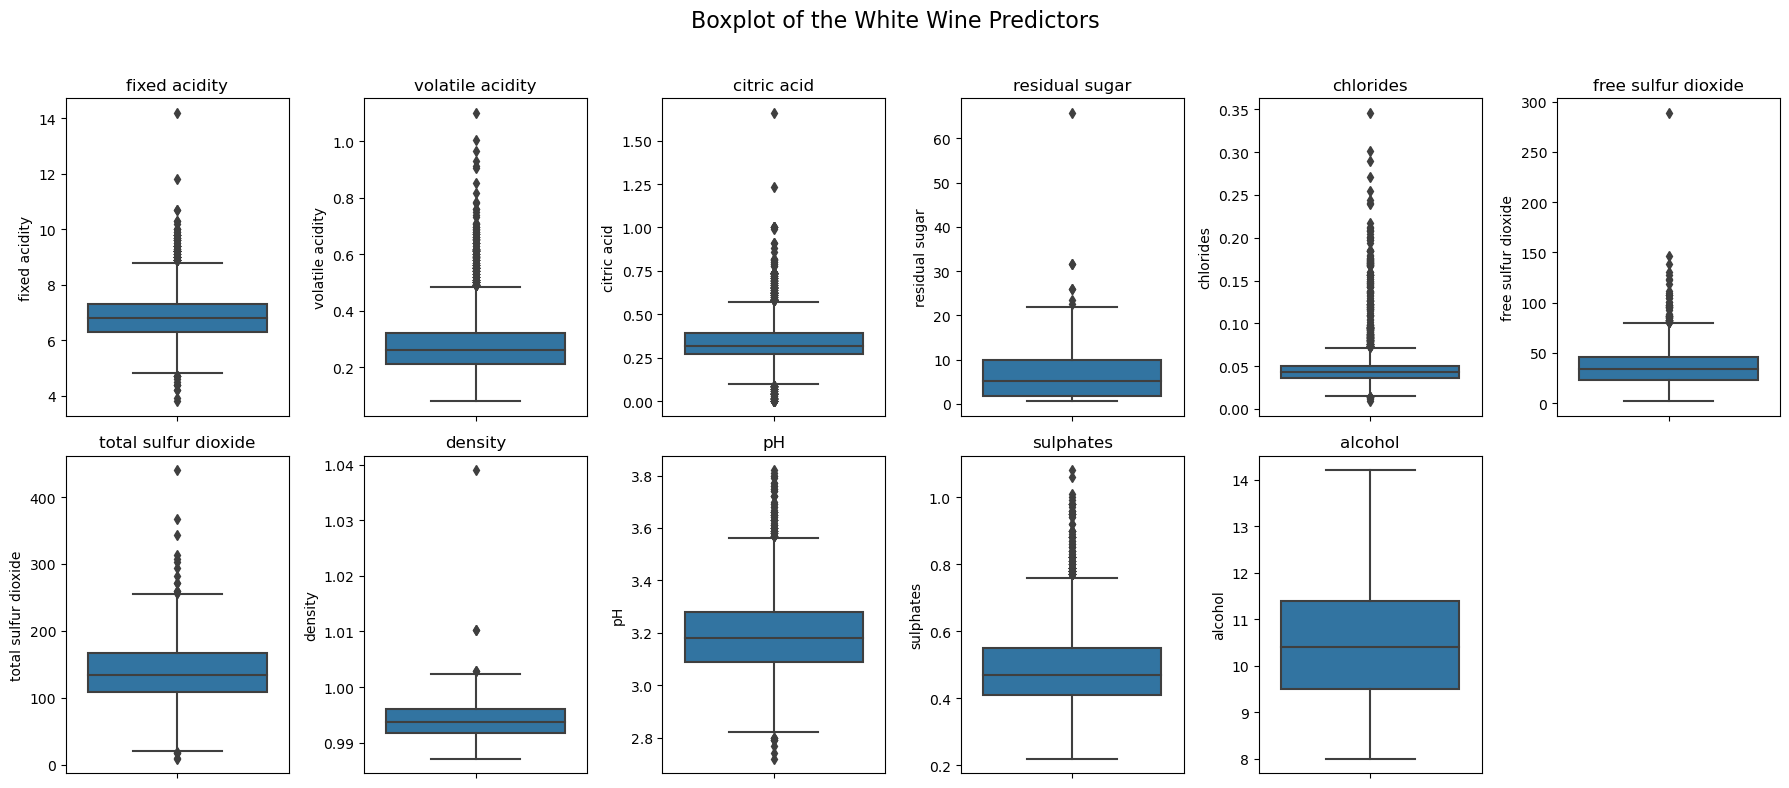

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select predictors (all columns except last one)
predictors = data.iloc[:, :-1]

# Create subplots: 2 rows × 6 columns (adjust figsize as needed)
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 8))
fig.suptitle("Boxplot of the White Wine Predictors", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each predictor
for i, col in enumerate(predictors.columns):
    sns.boxplot(y=predictors[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any empty subplots if predictors < 12
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


### With the help of Boxplot we can see the quantile range and outliers, except alcohol all variable has outliers

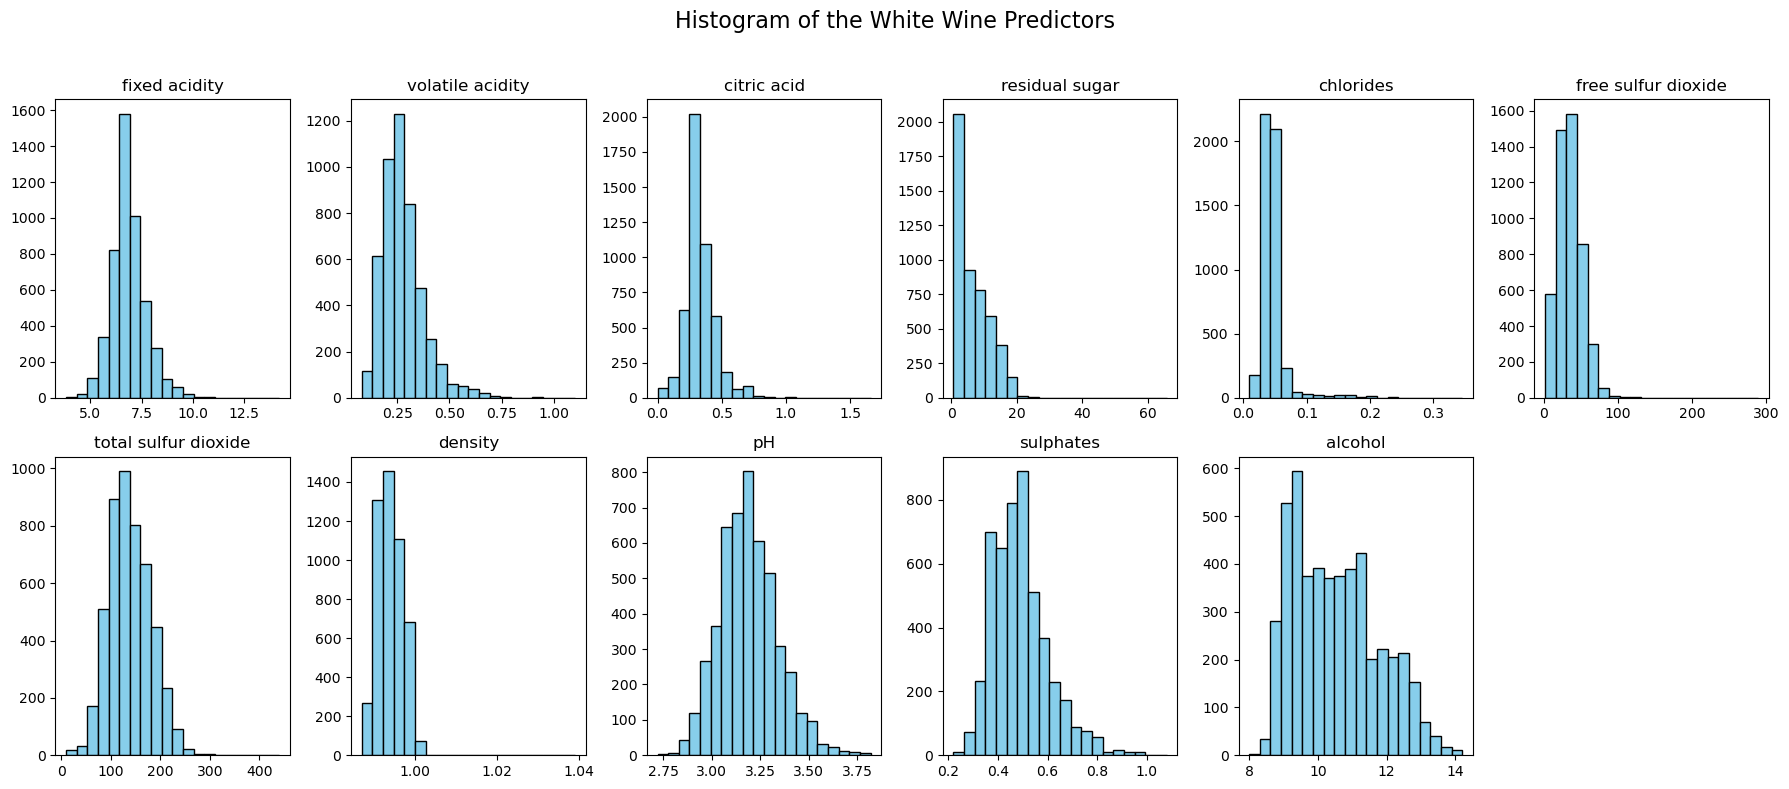

In [13]:
import matplotlib.pyplot as plt

def subplot_hist(data, row, column, title):
    fig, axes = plt.subplots(nrows=row, ncols=column, figsize=(18, 8))
    fig.suptitle(title, fontsize=16)
    axes = axes.flatten()

    for i, col in enumerate(data.columns):
        axes[i].hist(data[col], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(col)

    # Hide extra subplots if any
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
subplot_hist(data.iloc[:, :-1], row=2, column=6, title="Histogram of the White Wine Predictors")


### With the help of above plot we found that all the predictor are skewed to the right except ph which seems like a normal distribution

Text(0, 0.5, 'Alcohol')

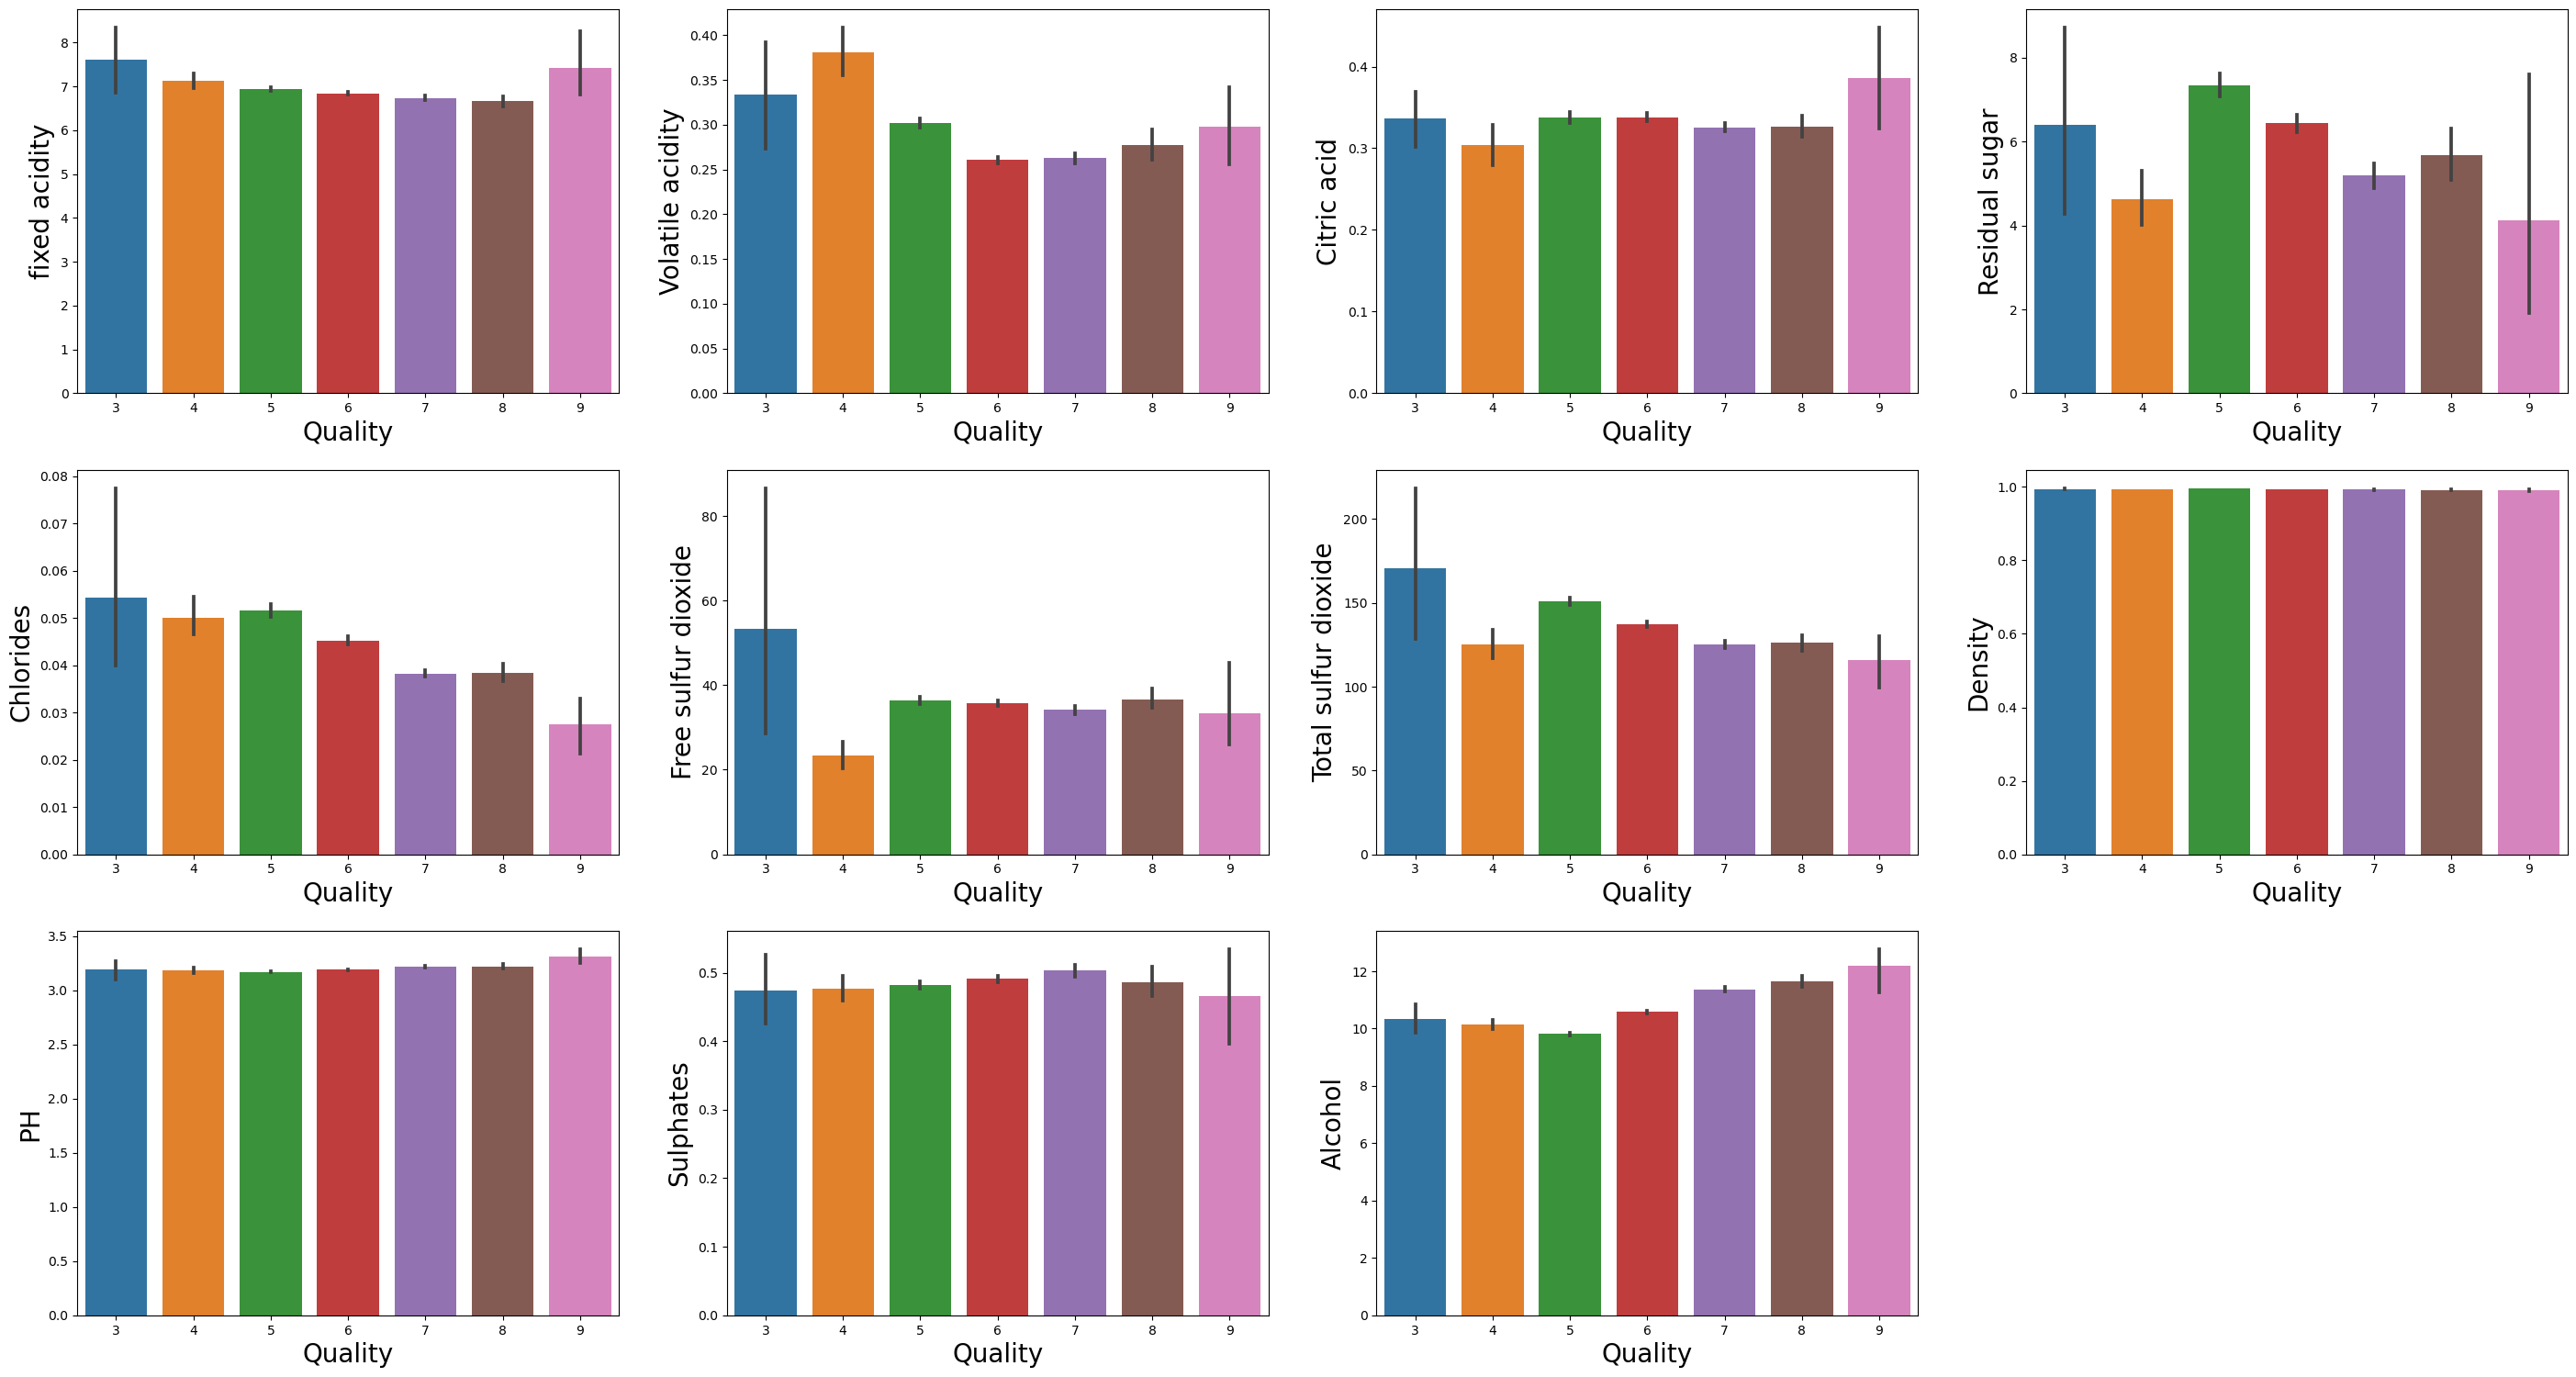

In [14]:
plt.figure(figsize=(35,25))
plt.subplot(4, 4, 1)
#fig = plt.figure(figsize = (10,6))
ax1 = sns.barplot(x = 'quality', y = 'fixed acidity', data = data)
ax1.set_xlabel('Quality',fontsize=20);
ax1.set_ylabel('fixed acidity',fontsize=20);

plt.subplot(4, 4, 2)
#fig = plt.figure(figsize = (10,6))
ax2= sns.barplot(x = 'quality', y = 'volatile acidity', data = data)
ax2.set_xlabel('Quality',fontsize=20);
ax2.set_ylabel('Volatile acidity',fontsize=20);

plt.subplot(4, 4, 3)
#fig = plt.figure(figsize = (10,6))
ax3= sns.barplot(x = 'quality', y = 'citric acid', data = data)
ax3.set_xlabel('Quality',fontsize=20);
ax3.set_ylabel('Citric acid',fontsize=20);

plt.subplot(4, 4, 4)
#fig = plt.figure(figsize = (10,6))
ax4 = sns.barplot(x = 'quality', y = 'residual sugar', data = data)
ax4.set_xlabel('Quality',fontsize=20);
ax4.set_ylabel('Residual sugar',fontsize=20);

plt.subplot(4, 4, 5)
#fig = plt.figure(figsize = (10,6))
ax5= sns.barplot(x = 'quality', y = 'chlorides', data = data)
ax5.set_xlabel('Quality',fontsize=20);
ax5.set_ylabel('Chlorides',fontsize=20);

plt.subplot(4, 4, 6)
#fig = plt.figure(figsize = (10,6))
ax6= sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)
ax6.set_xlabel('Quality',fontsize=20);
ax6.set_ylabel('Free sulfur dioxide',fontsize=20)

plt.subplot(4, 4, 7)
#fig = plt.figure(figsize = (10,6))
ax7=sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)
ax7.set_xlabel('Quality',fontsize=20);
ax7.set_ylabel('Total sulfur dioxide',fontsize=20)

plt.subplot(4, 4, 8)
#fig = plt.figure(figsize = (10,6))
ax8=sns.barplot(x = 'quality', y = 'density', data = data)
ax8.set_xlabel('Quality',fontsize=20);
ax8.set_ylabel('Density',fontsize=20)


plt.subplot(4, 4, 9)
#fig = plt.figure(figsize = (10,6))
ax9=sns.barplot(x = 'quality', y = 'pH', data = data)
ax9.set_xlabel('Quality',fontsize=20);
ax9.set_ylabel('PH',fontsize=20)



plt.subplot(4, 4, 10)
#fig = plt.figure(figsize = (10,6))
ax10=sns.barplot(x = 'quality', y = 'sulphates', data = data)
ax10.set_xlabel('Quality',fontsize=20);
ax10.set_ylabel('Sulphates',fontsize=20)


plt.subplot(4, 4, 11)
#fig = plt.figure(figsize = (10,6))
ax11=sns.barplot(x = 'quality', y = 'alcohol', data = data)
ax11.set_xlabel('Quality',fontsize=20);
ax11.set_ylabel('Alcohol',fontsize=20)

### Quality decreases as the amount of Chlorides decreases

### Hard to define any trend based on volatile acidity and Sugar

### Higher the alcohol better is the quality

### We can observe that Density and Ph is common that means density and pH is not playing any significant role

### Therfore a good quality wine can be prepared considering all these relations




# Data transformation
We a quality range from 3 to 9 therfore we are classifying it into 0 and 1,

0 = bad quality of wine hav quality less than 6.5

1= good quality wine with 6.5 above quality

used lamda function for classification

In [15]:
data['quality']=data['quality'].apply(lambda x: 1 if x >= 6.5 else 0 )


In [16]:
data['quality'].nunique()


2

In [17]:
data['quality'].value_counts()


quality
0    3838
1    1060
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

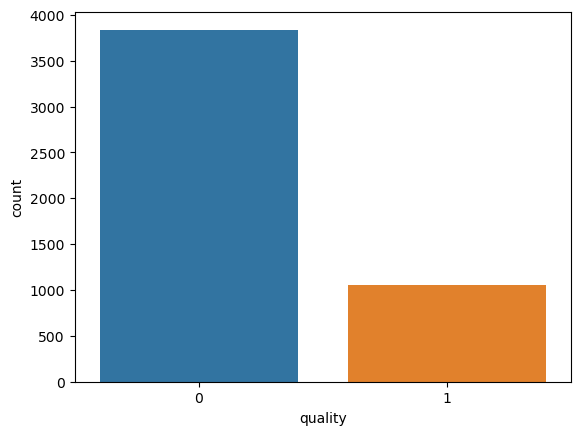

In [18]:
sns.countplot(x='quality',data=data)


### Most of the wine quantity falls under 0 


In [19]:
X = data.drop(['quality'],axis=1)
y= data['quality']

In [22]:
### Importing Required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,roc_curve,precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
%matplotlib inline

In [23]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [24]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Predictive modelling
Random forest

In [26]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
y_score = rfc.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, pred_rfc))

[[1108   49]
 [ 140  173]]


In [27]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))
x_rfc = accuracy_score(y_test, pred_rfc, normalize=True, sample_weight=None)
print("Accuracy of random forest :",x_rfc)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1157
           1       0.78      0.55      0.65       313

    accuracy                           0.87      1470
   macro avg       0.83      0.76      0.78      1470
weighted avg       0.86      0.87      0.86      1470

Accuracy of random forest : 0.8714285714285714


Support vector classifier


In [28]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(confusion_matrix(y_test, pred_svc))

[[1105   52]
 [ 204  109]]


In [29]:
print(classification_report(y_test, pred_svc))

x_svc= accuracy_score(y_test, pred_svc, normalize=True, sample_weight=None)
print("Accuracy of Support Vector Classifier(SVC) ",x_svc)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1157
           1       0.68      0.35      0.46       313

    accuracy                           0.83      1470
   macro avg       0.76      0.65      0.68      1470
weighted avg       0.81      0.83      0.80      1470

Accuracy of Support Vector Classifier(SVC)  0.8258503401360544


# Result
### Random forest model is performign better than support vector classifer.
### With these predictive model we can predict the quality of a new wine.
### Classification algorithms like Naive bayes, Logistic regression can also be used.And based on these algorithms we can use voting classifier to enhance the result.
### Voting classifier basically consider outcome of each algorithms and based on that it tries to find the result based on maximum votes